____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Cátedra de Investigación Operativa__\
__Autor: Rodrigo Maranzana__
____

# Ejemplo de gestión de Inventarios Multi-Producto

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Datos" data-toc-modified-id="Datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datos</a></span></li><li><span><a href="#Funciones-para-el-cálculo-de-costo-total-esperado-(CTE)" data-toc-modified-id="Funciones-para-el-cálculo-de-costo-total-esperado-(CTE)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funciones para el cálculo de costo total esperado (CTE)</a></span><ul class="toc-item"><li><span><a href="#Cálculo-de-costo-de-adquisición" data-toc-modified-id="Cálculo-de-costo-de-adquisición-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cálculo de costo de adquisición</a></span></li><li><span><a href="#Cálculo-de-costo-de-almacenamiento" data-toc-modified-id="Cálculo-de-costo-de-almacenamiento-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cálculo de costo de almacenamiento</a></span></li><li><span><a href="#Cálculo-de-costo-de-pedido" data-toc-modified-id="Cálculo-de-costo-de-pedido-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cálculo de costo de pedido</a></span></li><li><span><a href="#Costo-Total-Esperado" data-toc-modified-id="Costo-Total-Esperado-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Costo Total Esperado</a></span></li></ul></li><li><span><a href="#Cálculo-de-cantidades-óptimas:" data-toc-modified-id="Cálculo-de-cantidades-óptimas:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cálculo de cantidades óptimas:</a></span></li><li><span><a href="#Cálculo-de-Costo-Total-Esperado-Óptimo:" data-toc-modified-id="Cálculo-de-Costo-Total-Esperado-Óptimo:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cálculo de Costo Total Esperado Óptimo:</a></span></li><li><span><a href="#Valores-de-la-superficie-de-Costo-Total-Esperado" data-toc-modified-id="Valores-de-la-superficie-de-Costo-Total-Esperado-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Valores de la superficie de Costo Total Esperado</a></span></li><li><span><a href="#Gráfico-de-la-superficie-de-Costo-Total-Esperado" data-toc-modified-id="Gráfico-de-la-superficie-de-Costo-Total-Esperado-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gráfico de la superficie de Costo Total Esperado</a></span></li></ul></div>

## Introducción

En este ejemplo vamos a usar la teoría de Inventarios para administrar cantidades óptimas de pedido de dos productos. Tomamos distintas suposiciones:

- Usamos el modelo simplificado y determinista de inventarios, donde el reabastecimiento es inmediato y el consumo lineal.
- No existen restricciones de espacio, es decir, las cantidades de los productos son independientes. De esta manera, la función a optimizar es, simplemente, una combinación de ambas funciones para cada producto.

## Datos

Se nos proveen datos de inventarios para cada producto $1$ y $2$:

In [1]:
diasmes = 30
interes = 0.1 # anual

# Datos producto 1:
b_1 = 30 #costo por producto

compra_1 = 100 # unidad 
calidadrecepcion_1 = 200 # pedido
demanda_1 = 3000 # por año
k_1 = calidadrecepcion_1 + compra_1 # costo de orden
d_1 = demanda_1 # demanda
alquiler_1 = 30 # alquiler diario
ba_1 = alquiler_1 * diasmes * 12 # alquiler anual
i_1 = interes # mismo interés para ambos productos

# Datos producto 2:
b_2 = 40 #costo por producto
compra_2 = 150 # unidad 
calidadrecepcion_2 = 250 # pedido
demanda_2 = 4300 # por año
k_2 = calidadrecepcion_2 + compra_2 # costo de orden
d_2 = demanda_2 # demanda
alquiler_2 = 40 # diario
ba_2 = alquiler_2 * diasmes * 12 # alquiler anual
i_2 = interes # mismo interés para ambos productos

## Funciones para el cálculo de costo total esperado (CTE)

Necesitamos calcular para ambos productos: el costo de adquisición, almacenamiento y pedido. En primer lugar, importamos Numpy:

In [2]:
import numpy as np

Para reutilizar código, vamos a crear funciones de python para cada uno, que tomen como valores de entrada sus parámetros y variables.

### Cálculo de costo de adquisición
Es el costo total que depende del costo unitario del producto $b_i$ y la demanda del mismo $d_i$.

$Cadq = b_i*d_i$

In [3]:
def calcular_cadq(b, d):
    return b * d

### Cálculo de costo de almacenamiento
Es el costo en que se incurre por almacenar un producto. Depende de la cantidad $q_i$, el costo unitario de almacenamiento $c_{ui}$.

$Calm(q_i) = \dfrac{1}{2}*q_i*c_{ui}$

El costo unitario $c_{ui}$ se calcula de la siguiente forma:

$c_{ui} = b_i * i + b_{ai}$

Siendo $b_i$ el costo del producto y $b_{ai}$, un costo de almacenamiento adicional por producto, en este ejemplo es el alquiler.

In [4]:
def calcular_cstock(q, b, i, ba):
    return 0.5 * q * (b * i + ba)

### Cálculo de costo de pedido
Es el costo que surge cada vez que se hace un pedido de producto. Depende de $k_i$, el costo administrativo de pedido; $d_i$, la demanda de cada producto y $q_i$, la cantidad.

$Cpedido(q_i) = k_i * \dfrac{d_i}{q_i}$

In [5]:
def calcular_cpedido(k, d, q):
    return  k * (d / q)

### Costo Total Esperado
$CTE(q_i) = Cadq + Calm(q_i) + Cpedido(q_i)$

In [6]:
# Costo total esperado:
def calcular_cte(cdemanda, cstock, cpedido):
    return cdemanda + cstock + cpedido

## Cálculo de cantidades óptimas:

La cantidad óptima está donde la derivada del Costo Total Esperado se iguala a cero. La fórmula analítica es la siguiente:

$q_i^* = \sqrt{\dfrac{2*k_i*d_i}{c_u}}$

Donde $k_i$ es el costo administrativo de pedido del producto $i$; $d_i$, la demanda del producto $i$ y $c_u$, el costo unitario definido más arriba.

Podemos crear la siguiente función de Python que toma los argumentos de costo de orden $k$, la demanda $d$, el período de análisis $t$, y el costo unitario $c_1$. El output es el costo óptimo para un producto determinado.

In [7]:
def calcular_q_opt (k, d, b, i, ba):
    return np.sqrt((2 * k * d)/(b * i + ba))

Calculamos la cantidad óptima para ambos productos:

In [8]:
# Cálculo del Q1 óptimo:
q1_opt = calcular_q_opt(k_1, d_1, b_1, i_1, ba_1)
print(f'La cantidad óptima para el ítem 1 es: {q1_opt:.2f}')

# Cálculo del Q2 óptimo:
q2_opt = calcular_q_opt(k_2, d_2, b_2, i_2, ba_2)
print(f'La cantidad óptima para el ítem 2 es: {q2_opt:.2f}')

La cantidad óptima para el ítem 1 es: 12.91
La cantidad óptima para el ítem 2 es: 15.45


## Cálculo de Costo Total Esperado Óptimo:

Para calcular el Costo Total Esperado, necesitamos tres valores de cada producto calculados con la cantidad óptima $q^*$:
- El costo de adquisicion

In [9]:
# Producto 1:
cdemanda1 = calcular_cadq(b_1, d_1)
# Producto 2:
cdemanda2 = calcular_cadq(b_2, d_2)

# Print:
print(f"Costo de adquisición, producto 1: {cdemanda1:.2f}, producto 2: {cdemanda2:.2f}")

Costo de adquisición, producto 1: 90000.00, producto 2: 172000.00


- El costo de almacenamiento

In [10]:
# Producto 1:
cstock1 = calcular_cstock(q1_opt, b_1, i_1, ba_1)
# Producto 2:
cstock2 = calcular_cstock(q2_opt, b_2, i_2, ba_2)

# Print:
print(f"Costo de almacenamiento, producto 1: {cstock1:.2f}, producto 2: {cstock2:.2f}")

Costo de almacenamiento, producto 1: 69723.38, producto 2: 111298.88


- El costo de pedido

In [11]:
# Producto 1:
cpedido1 = calcular_cpedido(k_1, d_1, q1_opt)
# Producto 2:
cpedido2 = calcular_cpedido(k_2, d_2, q2_opt)

# Print:
print(f"Costo de pedido, producto 1: {cpedido1:.2f}, producto 2: {cpedido2:.2f}")

Costo de pedido, producto 1: 69723.38, producto 2: 111298.88


Con los valores anteriores calculamos el Costo Total Esperado Óptimo de cada producto:

In [12]:
# Producto 1:
cte_opt1 = calcular_cte(cdemanda1, cstock1, cpedido1)
# Producto 2:
cte_opt2 = calcular_cte(cdemanda2, cstock2, cpedido2)

# Print:
print(f"Costo Total Esperado, producto 1: {cte_opt1:.2f}, producto 2: {cte_opt2:.2f}")

Costo Total Esperado, producto 1: 229446.76, producto 2: 394597.75


Por último calculamos el Costo Total Esperado de ambos productos sumados:

In [13]:
# Total:
cte_opt_t = cte_opt1 + cte_opt2

# Print:
print(f'El Costo Total Esperado óptimo es: {cte_opt_t:.2f}')

El Costo Total Esperado óptimo es: 624044.52


## Valores de la superficie de Costo Total Esperado

El costo total esperado es una función de las cantidades de ambos productos, es decir, $CTE = f(q_1, q_2)$. Además para cada valor de $CTE$ encontramos una curva de nivel.

Para graficar la superficie que se forma variando las cantidades $q_1$ y $q_2$, necesitamos crear tiras de valores equiespaciados para cada una de ellas. Esto lo hacemos con el método *linspace* de *Numpy*.

Vamos a crear 50 valores para cada $q_i$:

In [14]:
# Cálculo y gráfico de la superficie de valores:
q1_linspace = np.linspace(1,50, 50)
q2_linspace = np.linspace(1,50, 50)

# Visualizamos:
print(f"linspace para $q_1$: {q1_linspace}\n")
print(f"linspace para $q_2$: {q2_linspace}")

linspace para $q_1$: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]

linspace para $q_2$: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


Dado que necesitamos crear combinaciones de cada valor de $q_1$ con $q_2$ para calcular, luego, el $CTE$ de ese punto, armamos una *meshgrid* de *Numpy*, es decir una malla o "sábana" de combinaciones de cantidades de ambos productos.

In [15]:
Q1, Q2 = np.meshgrid(q1_linspace, q2_linspace)

# Visualizamos:
print(f"Malla de valores para q_1:\n {Q1}\n")
print(f"Malla de valores para q_2:\n {Q2}")

Malla de valores para q_1:
 [[ 1.  2.  3. ... 48. 49. 50.]
 [ 1.  2.  3. ... 48. 49. 50.]
 [ 1.  2.  3. ... 48. 49. 50.]
 ...
 [ 1.  2.  3. ... 48. 49. 50.]
 [ 1.  2.  3. ... 48. 49. 50.]
 [ 1.  2.  3. ... 48. 49. 50.]]

Malla de valores para q_2:
 [[ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [48. 48. 48. ... 48. 48. 48.]
 [49. 49. 49. ... 49. 49. 49.]
 [50. 50. 50. ... 50. 50. 50.]]


Lo que sigue es iterar para cada combinación de la malla $(Q_1, Q_2)$ que creamos anteriormente y calcular un valor de $CTE$.
Es decir, cada iteración será un $(Q_{1i}, Q_{2i})$ del que calcularemos:
- costo de demanda
- costo de almacenamiento
- costo de pedido
- costo total esperado de ambos productos

El último ítem, es decir el CTE total, tenemos que guardarlo en un vector, para poder graficar más adelante.

Lo primero que hacemos entonces es crear este vector, que tendrá la longitud total de las combinaciones posibles de cantidades.

Luego, vamos a iterar para cada combinación. Dado que $Q_1$ y $Q_2$ son matrices, ya que representan la sábana de combinaciones va a ser difícil que Python entienda cómo iterarlas combinadas.

Hacemos lo siguiente:
- Usamos el método de *Numpy* *ravel* para convertir las matrices en tiras de valores, es decir, vectores.
- Usamos la función *zip* para crear combinaciones de cada uno de esos valores. Por ejemplo, si tenemos dos listas: A = [1, 2] y B = [3, 4], al hacer zip(A, B) generaremos: [(1, 3), (2, 4)]. Justamente lo que estamos buscando: armar las combinaciones de cantidades.
- Usamos enumerate para guardar el indice *i* de la iteración actual.

In [16]:
# Creamos el vector para guardar los valores de CTE de ambos productos:
vect_cte2 = np.zeros(Q1.shape[0] * Q1.shape[1])

# Iteramos para cada combinación de cantidades:
for i, (q1_i, q2_i) in enumerate(zip(np.ravel(Q1), np.ravel(Q2))):
    # Calculamos costo de demanda:
    cdemanda_i_1 = calcular_cadq(b_1, d_1)
    cdemanda_i_2 = calcular_cadq(b_2, d_2)
    cdemanda_i_tot = cdemanda_i_1 + cdemanda_i_2
    
    # Actualizar vector de costo de almacenamiento:
    cstock_i_1 = calcular_cstock(q1_i, b_1, i_1, ba_1)
    cstock_i_2 = calcular_cstock(q2_i, b_2, i_2, ba_2)
    cstock_i_tot = cstock_i_1 + cstock_i_2
    
    # Actualizar vector de costo de pedido:
    cpedido_i_1 = calcular_cpedido(k_1, d_1, q1_i)
    cpedido_i_2 = calcular_cpedido(k_2, d_2, q2_i)
    cpedido_i_tot = cpedido_i_1 + cpedido_i_2
    
    # Calculamos el costo total de ambos productos:
    cte_i_1 = calcular_cte(cdemanda_i_1, cstock_i_1, cpedido_i_1)
    cte_i_2 = calcular_cte(cdemanda_i_2, cstock_i_2, cpedido_i_2)
    cte_i_tot = cte_i_1 + cte_i_2
    
    # Guardamos el resultado de la iteración en el vector:
    vect_cte2[i] = cte_i_tot

## Gráfico de la superficie de Costo Total Esperado

En primer lugar, creamos un gráfico en 3 dimensiones para visualizar la superficie $CTE(q_1, q_2)$.

Importamos la librería *MatPlotLib* y configuramos algunas características.

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d
from matplotlib import cm
from matplotlib.patches import Circle

Vamos a redimensionar el vector de soluciones $CTE$ a una Matriz con las mismas dimensiones de las matrices de la sábana de combinaciones $Q_1$ y $Q_2$. Esto lo hacemos para que la entrada y salida del gráfico tengan dimensiones acordes. Para lograrlo usamos el método *reshape* de *Numpy*.

In [18]:
CTE2 = vect_cte2.reshape(Q1.shape)

Ahora sí, creamos la figura y el objeto de ejes con la librería *MatPlotLib* para poder graficar:

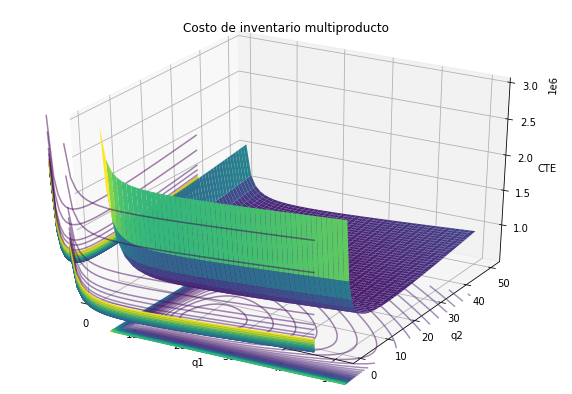

In [19]:
# plotear figura:
fig = plt.figure(figsize=(10,7))

# plotear superficie
ax = plt.axes(projection='3d')
ax.plot_surface(Q1, Q2, CTE2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Countour en z:
ax.contour(Q1, Q2, CTE2, 120, offset=-50, linestyles="solid", alpha=0.5)

# Proyecciones en x, y:
ax.contour(Q1, Q2, CTE2, 120, offset=-10, linestyles="solid", alpha=0.5, zdir='x')
ax.contour(Q1, Q2, CTE2, 120, offset=-10, linestyles="solid", alpha=0.5, zdir='y')

# agregar punto óptimo:
ax.scatter([q1_opt], [q2_opt], [cte_opt_t], color="r", s=20, marker='o', linewidth=5)

ax.set_title('Costo de inventario multiproducto')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('CTE')

plt.show()

Por último, vamos a graficar las curvas de nivel para un conjunto de soluciones $CTE$. Esto lo hacemos llamando al *contour* formado por la función en 3D.

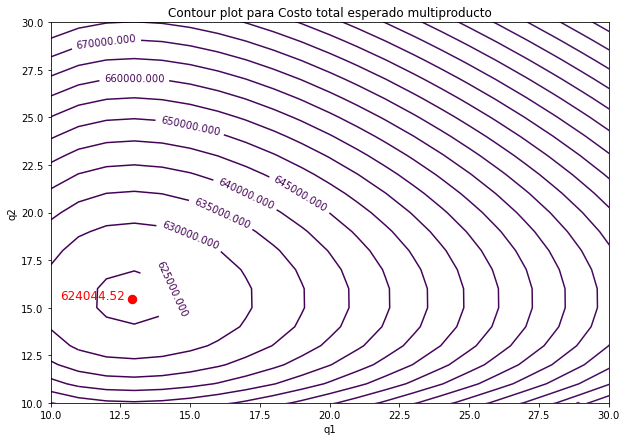

In [20]:
fig, ax0 = plt.subplots(figsize=(10,7))

# Z contour
CS0 = ax0.contour(Q1, Q2, CTE2, 500)
ax0.set_title('Contour plot para Costo total esperado multiproducto')
ax0.set_xlabel('q1')
ax0.set_ylabel('q2')
ax0.set_xlim([10, 30])
ax0.set_ylim([10, 30])
ax0.clabel(CS0, inline=1, fontsize=10)

# agregar punto óptimo:
ax0.scatter(q1_opt, q2_opt, color="r", s=20, marker='o', linewidth=5)
ax0.text(q1_opt*0.80, q2_opt, f"{cte_opt_t:.2f}", fontsize=12, color='r')

plt.show()